### CURNEU TASK-1 FRUIT DATASET

In [1]:
#importing all the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#reading the data using pandas
dat = pd.read_excel('F:\\projects\\curneu project\\problem\\fruits.xlsx')

In [4]:
#viewing the first 5 data
print(dat.head(5))

   fruit_label fruit_name  mass  width  height  color_score
0            1      apple   192    8.4     7.3         0.55
1            1      apple   180    8.0     6.8         0.59
2            1      apple   176    7.4     7.2         0.60
3            2   mandarin    86    6.2     4.7         0.80
4            2   mandarin    84    6.0     4.6         0.79


In [5]:
print(dat.describe())

       fruit_label        mass      width     height  color_score
count    59.000000   59.000000  59.000000  59.000000    59.000000
mean      2.542373  163.118644   7.105085   7.693220     0.762881
std       1.208048   55.018832   0.816938   1.361017     0.076857
min       1.000000   76.000000   5.800000   4.000000     0.550000
25%       1.000000  140.000000   6.600000   7.200000     0.720000
50%       3.000000  158.000000   7.200000   7.600000     0.750000
75%       4.000000  177.000000   7.500000   8.200000     0.810000
max       4.000000  362.000000   9.600000  10.500000     0.930000


Text(0.5, 1.0, 'Mass vs width')

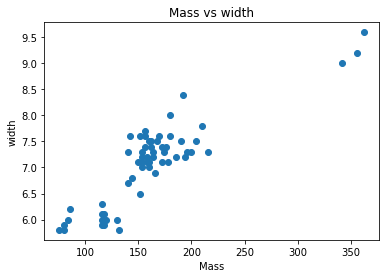

In [6]:
#plotting various combinations of parameter
plt.scatter(dat['mass'], dat['width'])
plt.xlabel('Mass', )
plt.ylabel('width')
plt.title('Mass vs width')

From the above plot we can see that the mass and width of the fruits are positively correlated. As the mass of the fruit increases, the width also increases. 

Text(0.5, 1.0, 'Mass vs height')

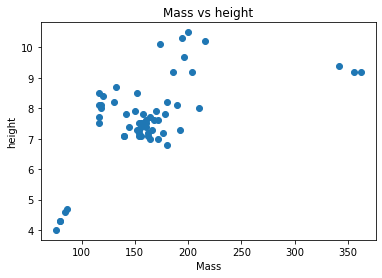

In [7]:
plt.scatter(dat['mass'], dat['height'])
plt.xlabel('Mass')
plt.ylabel('height')
plt.title('Mass vs height')

From the above plot we can observe that mass and height of the fruit are also positively correlated. But the correlation is weak. 

Text(0.5, 1.0, 'Mass vs Color_score')

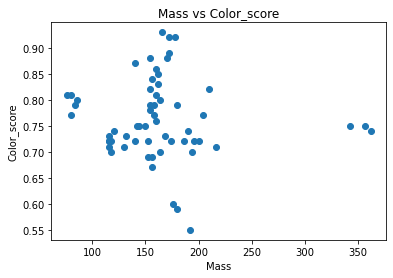

In [8]:
plt.scatter(dat['mass'], dat['color_score'])
plt.xlabel('Mass')
plt.ylabel('Color_score')
plt.title('Mass vs Color_score')

The plot shows us that mass and color score of the fruit are independent of each other. There is no correlation between the two variables.

Text(0.5, 1.0, 'Width vs Color_score')

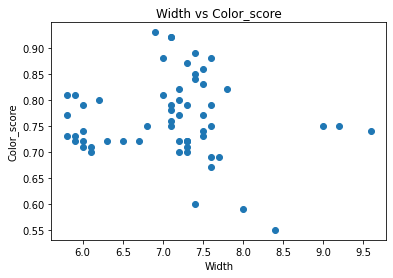

In [9]:
plt.scatter(dat['width'], dat['color_score'])
plt.xlabel('Width')
plt.ylabel('Color_score')
plt.title('Width vs Color_score')

From this plot we learn that width and color score of the fruit are not correlated.

In [10]:
#finding the correlation amoung the parameters
print(dat.iloc[:,1:].corr())

                 mass     width    height  color_score
mass         1.000000  0.877687  0.609571    -0.079794
width        0.877687  1.000000  0.396848    -0.076576
height       0.609571  0.396848  1.000000    -0.247047
color_score -0.079794 -0.076576 -0.247047     1.000000


In [26]:
features = ['width','color_score']
X = dat[features]
y = dat.iloc[:,0]

In [27]:
#splitting of dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [28]:
#standardize the training and test dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [29]:

#function to calculate euclidean distance
def euclid_dist(X1,X2):
    dist = np.sum((X1 - X2)**2)
    return np.sqrt(dist)

#function of knn predict

def knn_predict(X_train, X_test, y_train, y_test, k):
    
    # Counter to help with label voting
    from collections import Counter
    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = euclid_dist(test_point, train_point)
            distances.append(distance)
        
        # Storing distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        # Sort distances and considering the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        y_hat_test.append(prediction)
        
    return y_hat_test

Text(0, 0.5, 'Mean Error')

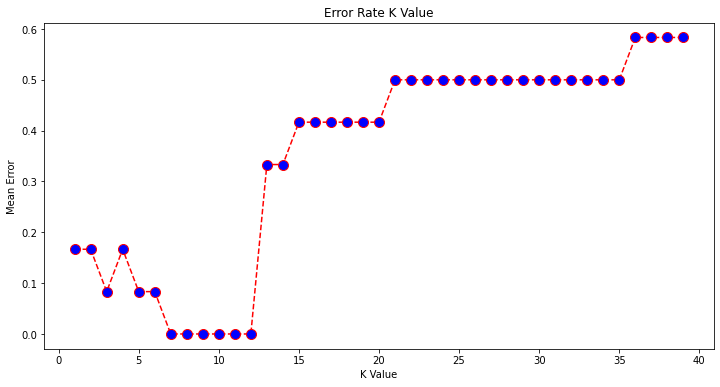

In [30]:
error = []
for i in range(1, 40):
    pred_i = knn_predict(X_train, X_test, y_train, y_test, k=i)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From the above plot, we learn that the best k-value for the model is 3 since the error is the lowest at k=3.

In [31]:
y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=3)
print(y_test)
print(y_hat_test)

23    1
49    4
9     1
12    1
20    1
22    1
1     1
31    3
40    3
30    3
57    4
54    4
Name: fruit_label, dtype: int64
[1, 4, 1, 1, 1, 1, 1, 1, 3, 3, 4, 4]


In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

print('Accuracy:', accuracy_score(y_test,y_hat_test))
print('r2 score:', r2_score(y_test,y_hat_test))

Accuracy: 0.9166666666666666
r2 score: 0.8024691358024691
